<a href="https://colab.research.google.com/github/kayon00/UTS-metode-numerik/blob/main/vehicle_part_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install necessary libraries
!pip install ultralytics  # Install YOLOv8
!pip install matplotlib opencv-python-headless
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
# Step 2: Import libraries
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
import cv2
import numpy as np




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="p9AE4cfyWZVtKr7MenmF")
# project = rf.workspace("testingws").project("object-detection-bbaki")
# version = project.version(3)
# dataset = version.download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TDZii1qX5D6LJBtulJpA")
project = rf.workspace("ibad-al-hayyun-lc7sy").project("ibad-al-hayyun-fhofb")
version = project.version(2)
dataset = version.download("yolov8")







loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ibad-al-hayyun-2 in yolov8:: 100%|██████████| 212/212 [00:00<00:00, 6773.87it/s]


In [5]:
import os

# Lihat folder tempat dataset diunduh
dataset_location = dataset.location  # dari RoboFlow download
print("Dataset downloaded to:", dataset_location)

Dataset downloaded to: /content/ibad-al-hayyun-2


In [6]:
from ultralytics import YOLO

# Buat model YOLOv8 baru
model = YOLO("yolov8n.pt")  # "yolov8n.pt" adalah versi YOLOv8 Nano

# Jalankan pelatihan dengan dataset
model.train(data="/content/ibad-al-hayyun-2/data.yaml", epochs=25, imgsz=320)

100%|██████████| 6.25M/6.25M [00:00<00:00, 96.6MB/s]


Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/ibad-al-hayyun-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 21.4MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/ibad-al-hayyun-2/train/labels... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<00:00, 590.84it/s]

train: New cache created: /content/ibad-al-hayyun-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9, len(boxes) = 245. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/ibad-al-hayyun-2/valid/labels... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<00:00, 2068.64it/s]

val: New cache created: /content/ibad-al-hayyun-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      2.959      5.335      1.691         12        320: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]

                   all         37        139          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G       2.64      5.079      1.565         21        320: 100%|██████████| 4/4 [00:13<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all         37        139          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G       2.29      5.145      1.298         15        320: 100%|██████████| 4/4 [00:12<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.21s/it]

                   all         37        139          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      2.222      4.789      1.306         24        320: 100%|██████████| 4/4 [00:12<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all         37        139          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      2.257      4.857      1.158          8        320: 100%|██████████| 4/4 [00:12<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all         37        139          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      2.033      4.531      1.216         21        320: 100%|██████████| 4/4 [00:11<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.03s/it]

                   all         37        139          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      2.032      4.137      1.103         15        320: 100%|██████████| 4/4 [00:11<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.56s/it]

                   all         37        139          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G      2.341      4.227      1.067         10        320: 100%|██████████| 4/4 [00:12<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.03s/it]

                   all         37        139          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      2.207      3.883      1.113         31        320: 100%|██████████| 4/4 [00:12<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all         37        139          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      2.141      3.372      1.067         32        320: 100%|██████████| 4/4 [00:12<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all         37        139   0.000777     0.0107    0.00626    0.00135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      2.065        3.5      1.136         10        320: 100%|██████████| 4/4 [00:12<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all         37        139    0.00448      0.064     0.0332     0.0132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G       2.27      3.455      1.091         26        320: 100%|██████████| 4/4 [00:12<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all         37        139    0.00623      0.096     0.0485     0.0207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G      2.154      3.335      1.034         38        320: 100%|██████████| 4/4 [00:12<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all         37        139    0.00618      0.101     0.0523     0.0228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      1.896      3.094      1.024         22        320: 100%|██████████| 4/4 [00:12<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]

                   all         37        139    0.00625      0.104      0.053     0.0222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G      2.001      3.047      1.075         19        320: 100%|██████████| 4/4 [00:12<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.94s/it]

                   all         37        139    0.00605      0.109     0.0567     0.0246


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G      1.879      2.955     0.9858         10        320: 100%|██████████| 4/4 [00:13<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.14s/it]

                   all         37        139    0.00641       0.12     0.0579     0.0238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G      2.101      2.764      1.036         21        320: 100%|██████████| 4/4 [00:11<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all         37        139     0.0066      0.145     0.0591     0.0242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G      1.823      2.774      1.019         20        320: 100%|██████████| 4/4 [00:12<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all         37        139    0.00624       0.17      0.065     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G      2.005      2.806     0.9704         14        320: 100%|██████████| 4/4 [00:12<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]

                   all         37        139    0.00601      0.172      0.067     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G      2.299      3.121     0.9944         14        320: 100%|██████████| 4/4 [00:12<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all         37        139    0.00581       0.18     0.0721     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G      1.867      2.592     0.9956         23        320: 100%|██████████| 4/4 [00:12<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all         37        139      0.921     0.0507     0.0924     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G      1.743      2.446     0.9952         14        320: 100%|██████████| 4/4 [00:12<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all         37        139      0.955     0.0427     0.0926     0.0391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G      1.625      2.449     0.9537         13        320: 100%|██████████| 4/4 [00:12<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all         37        139      0.934     0.0533     0.0983       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G      1.751      2.457      1.032         20        320: 100%|██████████| 4/4 [00:12<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.01s/it]

                   all         37        139      0.905     0.0587     0.0995     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G      1.814      2.444     0.9456         23        320: 100%|██████████| 4/4 [00:11<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.32s/it]

                   all         37        139      0.688      0.064     0.0994     0.0407



25 epochs completed in 0.118 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]


                   all         37        139      0.687      0.064     0.0993     0.0407
                     -         20         28          1          0          0          0
- collaborate with your team on computer vision projects         29         75      0.437       0.32      0.341       0.16
Roboflow is an end-to-end computer vision platform that helps you          1          1          1          0          0          0
This dataset was exported via roboflow.com on October 16- 2024 at 12-07 PM GMT         25         26          1          0     0.0714     0.0293
baseball - v3 2024-10-16 3-54am          9          9          0          0     0.0842     0.0143
Speed: 0.6ms preprocess, 80.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x793c183d2410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [7]:
from ultralytics import YOLO

# Muat model terlatih
model = YOLO("/content/runs/detect/train/weights/best.pt")


In [8]:
dataset = version.download("yolov8")

In [9]:
# result = model.predict(source="/content/gol3.png", save=True, imgsz=320)

image_path = "/content/gambartes.jpg"
gray_image_path = "/content/gambartes_gray.jpg"

# Baca gambar
image = cv2.imread(image_path)

# Ubah ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Simpan gambar grayscale
cv2.imwrite(gray_image_path, gray_image)



result = model.predict(source="/content/gambartes.jpg", imgsz=640, save=True)



image 1/1 /content/gambartes.jpg: 640x640 (no detections), 258.6ms
Speed: 3.7ms preprocess, 258.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


Total Bounding Boxes: 0


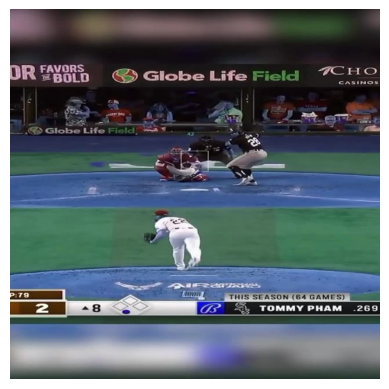

In [10]:
# Ambil elemen pertama dari hasil prediksi
image_result = result[0]

# Ekstrak bounding box, confidence, dan class
for box in image_result.boxes.data:
    # box adalah tensor [x_min, y_min, x_max, y_max, confidence, class]
    x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()

    # Cetak bounding box
    print(f"Bounding Box: ({x_min:.2f}, {y_min:.2f}, {x_max:.2f}, {y_max:.2f})")
    print(f"Confidence: {confidence:.2f}")
    print(f"Class ID: {int(class_id)}")

# Menghitung jumlah bounding box
total_bounding_boxes = len(image_result.boxes.data)
print(f"Total Bounding Boxes: {total_bounding_boxes}")

# Menampilkan hasil deteksi
from IPython.display import Image, display
image_path_with_predictions = image_result.plot()  # Mengembalikan array gambar

# Tampilkan menggunakan Matplotlib
import matplotlib.pyplot as plt
plt.imshow(image_path_with_predictions)
plt.axis("off")
plt.show()

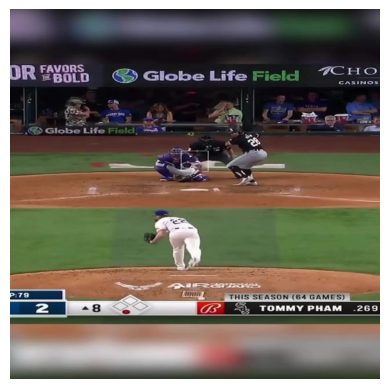

In [11]:
import cv2

# Buka gambar asli
img = cv2.imread("/content/gambartes.jpg")

# Loop untuk menggambar bounding box
for box in image_result.boxes.data:
    x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)

    # Gambar bounding box
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    label = f"Class: {int(class_id)}, Conf: {confidence:.2f}"
    cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Tampilkan gambar dengan Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [12]:
!ls runs/detect/predict


gambartes.jpg


In [13]:
# Step 3: Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving gambartes.jpg to gambartes (1).jpg


In [14]:
# Step 4: Load YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model (nano version for speed)

In [15]:
# Step 5: Perform object detection
results = model(image_path)  # Run inference on the uploaded image


image 1/1 /content/gambartes (1).jpg: 640x640 9 persons, 1 baseball glove, 268.8ms
Speed: 3.8ms preprocess, 268.8ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


In [16]:
# Step 6: Visualize results
# Save the annotated image
annotated_img = results[0].plot()  # Create an annotated image (numpy array)

In [17]:
cv2.imwrite("runs/detect/predictions.jpg", annotated_img)

True

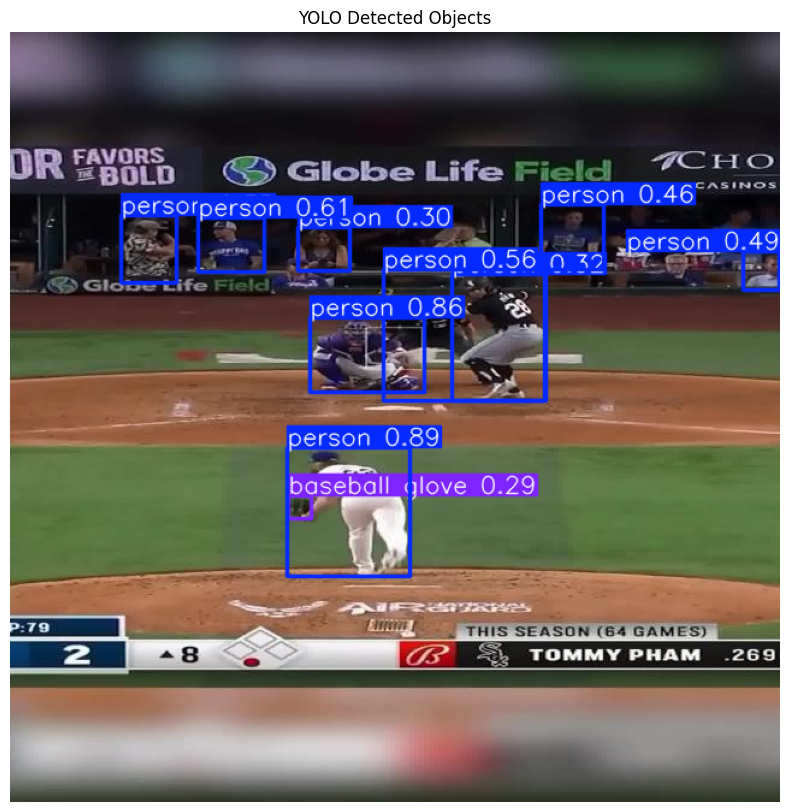

In [18]:
# Display the annotated image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLO Detected Objects")
plt.show()